# Logistic regression

## Introduction

Examples of questions that logistic regression can help address:
- What factors influence the odds that a customer buys from a company again?
- What impacts the likelihood a worker receives high performance ratings?
- What contributes to a user commenting or not commenting on a video?

Logistic regression:
- A technique that models a categorical dependent variable (Y) based on one or more independent variables (X)
- The dependent variable can have 2 or more possible discrete values

Binomial logistic regression:
- Models the probability of an observation falling into one of two categories, based on one or more independent variables
- Use a binary variable Y to indicate the category

Example:
- Let’s say that you’re a data professional working for a basketball team, and you want to understand the probability that any given player on your team will score more than 10 points in a game. There are many variables you might want to consider. For example, how well did the player perform last season? What’s their average playing time? How many points did they score this season?
- Consider the outcome variable: whether or not the player will score more than 10 points in a basketball game. This is a binary outcome variable. There are only 2 possible outcomes.

Assumption 1:
- The first and most important assumption of binomial logistic regression is the linearity assumption, which is a bit different from the linearity assumption for linear regression.
- In binomial logistic regression, the linearity assumption states that there should be a linear relationship between each X variable and the logit [pronounced: low-jit] of the probability that Y equals 1. The linearity assumption is the key assumption that explains how we can estimate a logistic regression model that fits the data best. To understand logit, we must first define the odds.

Odds:
- The odds of a given probability p is equal to p divided by 1 minus p. We can think of the equation as the probability of p occurring divided by the probability of p NOT occurring.
- Odds = p / (1-p)
- For example, let’s imagine that in a package of cookies with different flavors, you know that about 60% are chocolate. You’ll represent this as 0.6. Then the probability of a cookie NOT being chocolate is 0.4 because 1 MINUS 0.6 is 0.4. The odds a given cookie is chocolate, is 0.6 divided by 0.4, which is 1.5.

Logit:
- The logit or log odds function is the logarithm of the odds of a given probability. So the logit of probability p is equal to the logarithm of p divided by 1 minus p. Logit is the most common link function used to linearly relate the X variables to the probability of Y.
- logit(p) = log(p / (1-p))
- To translate this into less technical language, let’s explore the basketball example further. If you’re working for a basketball team, as a data practitioner, you want to know the likelihood of your players scoring many points in a game, rather than the other outcome: that they don’t score many points.
- By assuming that there is a linear relationship between the X variables and the logit of the probability that Y equals our outcome of interest, or 1, you can then find some beta coefficients that explain the data you’ve observed.
- Logit in terms of X Variables: logit(p)=log(p/(1-p))=0+1X_1+2X_2+...+nX_n

MLE:
- And like linear regression, we don’t want just any set of beta coefficients. We want the BEST set of beta coefficients to make sure our model fits the data. In linear regression, we minimized the sum of squared residuals, which is a measure of error, to figure out the best model. In logistic regression, we’ll often use maximum likelihood estimation to find the best logistic regression model.
- Maximum likelihood estimation, or M-L-E, is a technique for estimating the beta parameters that maximize the likelihood of the model producing the observed data.

Likelihood:
- We can think of likelihood as the probability of observing the actual data, given some set of beta parameters.

Assumption 2:
- Aside from linearity between each X variable and the logit of the Y variable, we also assume that the observations are independent. This assumption relates to how the data was collected.
- Because the observations are assumed to be independent, we can say that the probability of observing data point A AND observing data point B is equal to the probability of observing A times the probability of observing B.
- Therefore, if you have n basketball players on your team, you can calculate the likelihood of observing the outcome for each player, and then multiply all of the likelihoods together to determine the likelihood of observing all of the sample data. The best logistic regression model estimates the set of beta coefficients that maximizes the likelihood of observing all of the sample data.

Assumption 3:
- We assume that there is little or no multicollinearity between the independent variables. If we include multiple X variables, they should not be highly correlated with one another, just like with linear regression.

Assumption 4:
- Lastly, we assume that there are no extreme outliers in the dataset. Outliers are a complex topic in regression modeling and can be detected after the model is fit. Sometimes, it is appropriate to transform or adjust variables to maintain model validity. Other times it can be appropriate to remove outlier data.










## Scenario

For this notebook, imagine that you work as a consultant for an airline. They are interested in knowing if a better inflight entertainment experience leads to higher satisfaction. The airline would like you to construct and evaluate a model that predicts whether a future customer would be satisfied with their service given customer feedback about the details of their trip.

The data for this activity covers a sample size of 129,880 customers. It includes data points such as class, flight distance, and inflight entertainment, among others. Your goal will be to utilize a binomial logistic regression model to help the airline model and better understand this data.

You’ll practice the following skills:

* Importing packages and loading data
* Exploring the data and completing the cleaning process
* Building a binomial logistic regression model
* Evaluating a binomial logistic regression model using a confusion matrix

## Step 1. Relevant Imports

In this section, you will first import relevant Python packages. `train_test_split`, `LogisticRegression`, and various imports from `sklearn.metrics` will be needed to build, visualize, and evaluate the model.

### Import packages

In [ ]:
# Standard operational package imports
import numpy as np
import pandas as pd

# Important imports for preprocessing, modeling, and evaluation
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

# Visualization package imports
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

Load the "Invistico_Airline.csv" Airlines Customer satisfaction dataset. Save the resulting pandas dataframe in a variable named `df_original`.

In [ ]:
df_original = pd.read_csv("Invistico_Airline.csv")

Now, output the first 10 rows of data.

In [ ]:
df_original.head(n = 10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


## Step 2. Data Exploration, Cleaning, and Model Preparation

After loading the dataset, the next step is to prepare the data to be suitable for a logistic regression model. This includes:

*   Exploring data
*   Checking for missing values
*   Encoding data
*   Renaming a column
*   Creating the training and testing data

### Exploring data

Check the data type of each column. Note that logistic regression models expect numeric data.

In [ ]:
df_original.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

To predict customer satisfaction, the next step is to check how many customers are satisfied in the dataset before modeling.

In [ ]:
df_original['satisfaction'].value_counts()

satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64

#### <strong>Question: How many satisfied and dissatisfied customers are there?</strong>

There are 71,087 satisfied customers and 58,793 dissatisfied customers.

In [ ]:
df_original['satisfaction'].value_counts(normalize=True)

satisfied       0.547328
dissatisfied    0.452672
Name: satisfaction, dtype: float64

#### **Question: What percent of customers were satisfied?**
Approximately 54.7 percent (71,087/129,880) of customers were satisfied.

### Checking for missing values

Check for missing values in the columns of the data.

In [ ]:
df_original.isna().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [ ]:
df_original.shape

(129880, 22)

**Question:  Is removing rows where the `Arrival Delay in Minutes` column has missing values a good idea even though the airline is more interested in the `inflight entertainment` column?**

For this activity, the airline is specifically interested in knowing if a better inflight entertainment experience leads to higher satisfaction. This column won't be included in the binomial logistic regression model, however the airline might become interested in this column in the future.

For now, you can remove the missing values for two reasons:

* There are only 393 missing values out of the total 129,880, so it is a small amount.
* This column might impact the relationship between entertainment and satisfaction.

Drop the rows with missing values and save the resulting pandas dataframe in a variable named `df_subset`.

In [ ]:
df_subset = df_original.dropna(axis=0).reset_index(drop = True)

### Data preparation

If you want to create a plot (`sns.regplot`) of your model to visualize results later in the notebook, the independent variable `Inflight entertainment` cannot be of type int. And the dependent variable `satisfaction` cannot be of type object.

Start by making the `Inflight entertainment` column of type float.

In [ ]:
df_subset = df_subset.astype({"Inflight entertainment": float})

Convert the categorical column `satisfaction` into numeric through one-hot encoding.

In [ ]:
OneHotEncoder(drop='first').fit_transform(df_subset[['satisfaction']])

<129487x1 sparse matrix of type '<class 'numpy.float64'>'
	with 70882 stored elements in Compressed Sparse Row format>

In [ ]:
OneHotEncoder(drop='first').fit_transform(df_subset[['satisfaction']]).toarray()

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

In [ ]:
df_subset['satisfaction'] = OneHotEncoder(drop='first').fit_transform(df_subset[['satisfaction']]).toarray()


To examine what one-hot encoding did to the dataframe, output the first 10 rows of `df_subset`.

In [ ]:
df_subset.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,1.0,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,1.0,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,1.0,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,1.0,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,1.0,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,1.0,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,1.0,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,1.0,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,1.0,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


### Isolate X and y



In [ ]:
X = df_subset[["Inflight entertainment"]]
y = df_subset["satisfaction"]

In [ ]:
X.head()

,Inflight entertainment
0,4.0
1,2.0
2,0.0
3,4.0
4,3.0


In [ ]:
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: satisfaction, dtype: float64

### Create the training and testing data

Put 70% of the data into a training set and the remaining 30% into a testing set.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((90640, 1), (38847, 1), (90640,), (38847,))

## Step 3. Model Building

### Fit a LogisticRegression model to the data

Build a logistic regression model and fit the model to the training data.

In [ ]:
clf = LogisticRegression().fit(X_train,y_train)

### Obtain parameter estimates
Make sure you output the two parameters from your model.

In [ ]:
clf.coef_

array([[0.99751462]])

In [ ]:
clf.intercept_

array([-3.19355406])

Create a plot of your model to visualize results using the seaborn package.

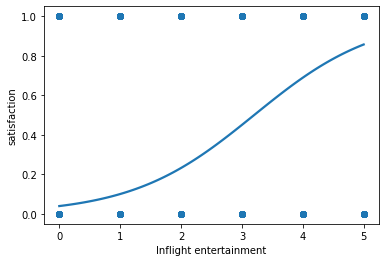

In [ ]:
sns.regplot(x="Inflight entertainment", y="satisfaction", data=df_subset, logistic=True, ci=None);

#### <strong> Question: What can you tell from the graph?</strong>

The graph seems to indicate that the higher the `inflight entertainment` value, the higher satisfaction, though this is currently not the most informative plot. The graph currently doesn't provide much insight into the data points as `Inflight entertainment` is categorical.

## Step 4. Results and Evaluation

Now that you've completed your regression, you can review and analyze your results.

### Predict Outcome for the test dataset

Now input the holdout dataset into the predict function to get the predicted labels from the model. Save these predictions as a variable called `y_pred`.

In [ ]:
# Save predictions
y_pred = clf.predict(X_test)

In order to examine the predictions, print out `y_pred`.

In [ ]:
print(y_pred)

[1. 0. 0. ... 0. 0. 0.]


Use the `predict_proba` function on `X_test`. This will return probability estimates for all classes, ordered by the label of classes.

In [ ]:
clf.predict_proba(X_test)

array([[0.14258068, 0.85741932],
       [0.55008402, 0.44991598],
       [0.89989329, 0.10010671],
       ...,
       [0.89989329, 0.10010671],
       [0.76826225, 0.23173775],
       [0.55008402, 0.44991598]])

### Analyze results
Print out the model's accuracy, precision, recall, and F1 score.

In [ ]:
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.801529
Precision: 0.816142
Recall: 0.821530
F1 Score: 0.818827


### Produce a confusion matrix

Data professionals often like to know the types of errors made by an algorithm. While the previous metrics are useful, produce a confusion matrix in the cell below.

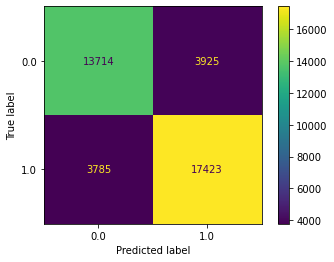

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
disp.plot()
plt.show()

#### <strong>Question: What stands out to you about the confusion matrix?</strong>

You can verify that the lower left and top right corners are both under 4,000, which are relatively low numbers. These numbers relate to false negatives and false positives.

Additionally, the other two quadrants show the true negatives and true positives, which are both high numbers above 13,000.

#### <strong>Question: Did you notice any difference in the amount of false positives or false negatives that the model produced?</strong>

There isn't a large difference in the number of false positives and false negatives.

#### <strong>Question: What do you think could be done to improve model performance?</strong>

A big step would be to try using more than a single independent variable in the model training process. This is because other variables, like `Departure Delay in Minutes,` seem like they can be potentially influential to customer satisfaction.

## Conclusion

**What are the key takeaways?**
*   A lot of machine learning workflows are about cleaning, encoding, and scaling data for machine learning.
*   The approach you use to plot or graph your data may depend on the type of variable you are evaluating.
*   Training a logistic regression model on a single independent variable can produce a relatively good model (80.2 percent accuracy).

**What results would you present?**

*   Logistic regression accurately predicted satisfaction 80.2 percent of the time.  
*   The confusion matrix is useful as it displays a similar amount of true positives and true negatives.

**What would you convey to external stakeholders?**
*  Customers who rated inflight entertainment highly were more likely to be satisfied. Improving inflight entertainment should lead to better customer satisfaction.
*  The model is 80.2 percent accurate. This is an improvement over the dataset's customer satisfaction rate of 54.7 percent.
*  The success of the model suggests that the airline should invest more effort into model developement to examine if adding more independent variables leads to better results. Building this model could not only be useful in predicting whether a customer would be satisfied or not, but also lead to a better understanding of what independent variables lead to happier customers.